# AutoML tools: LazyPredict & PyCaret

In this notebook, we will explore two powerful AutoML libraries: **LazyPredict** and **PyCaret**. These libraries provide user-friendly interfaces for automating various steps in the machine learning workflow, making it easier for both beginners and experienced data scientists to build and evaluate machine learning models. 

We will be using these tools for regression (Boston dataset) and classification (Titanic dataset) problems. We will compare their features and limitations. 

First, we install AutoML libraries.

In [0]:
pip install -q pycaret lazypredict

Python interpreter will be restarted.
Python interpreter will be restarted.


Then we load the Boston dataset using Pandas.

In [0]:
import pandas as pd

boston_df = pd.read_csv('../../Data/Boston.csv')

Before using AutoML tools, let's take a quick look at our dataset and its structure:

In [0]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
from sklearn.model_selection import train_test_split

X = boston_df.iloc[:, 1:14]
y = boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Regression with LazyPredict

LazyPredict is an open-source Python library which applies various machine learning models on a dataset and compares their performances. It supports regression and classification problems. 

LazyPredict is a very simple tool **without hyperparameter tuning**.

Let's try it out!

In [0]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [03:03<00:00,  4.36s/it]


In [0]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.76,0.79,4.12,4.08
BaggingRegressor,0.72,0.75,4.48,4.75
RandomForestRegressor,0.71,0.74,4.56,5.05
XGBRegressor,0.70,0.74,4.62,4.62
ExtraTreesRegressor,0.68,0.73,4.73,4.28
HistGradientBoostingRegressor,0.66,0.70,4.94,4.29
LGBMRegressor,0.65,0.70,4.95,5.00
AdaBoostRegressor,0.63,0.68,5.11,7.25
PoissonRegressor,0.57,0.63,5.52,3.78


You can also pass to LazyRegressor() additional optional parameters such as the **verbose** flag, which controls the level of output produced during training, and the **custom_metric** parameter, which allows you to specify a custom metric to use for evaluating the model. See example below:

In [0]:
from sklearn.metrics import mean_absolute_error

reg = LazyRegressor(verbose=0, predictions=True, custom_metric = mean_absolute_error)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [04:10<00:00,  5.97s/it]


In [0]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_absolute_error
Model,,,,,
GradientBoostingRegressor,0.76,0.79,4.12,4.64,2.66
BaggingRegressor,0.72,0.75,4.48,3.99,2.81
RandomForestRegressor,0.71,0.74,4.56,7.38,2.73
XGBRegressor,0.70,0.74,4.62,7.55,2.80
ExtraTreesRegressor,0.68,0.73,4.73,4.33,2.74
HistGradientBoostingRegressor,0.66,0.70,4.94,3.97,2.83
LGBMRegressor,0.65,0.70,4.95,8.74,2.86
AdaBoostRegressor,0.63,0.68,5.11,4.66,3.26
PoissonRegressor,0.57,0.63,5.52,6.88,3.42


Now we can see our custom metric in the last column.

We got top-5 models: 
* Gradient Boosting Regressor
* Bagging Regressor
* Random Forest Regressor
* XGB Regressor 
* Extra Trees Regressor. 

LazyPredict provides an easy way to see which models work better, so we can focus on them, tune hyperparameters etc.

The disadvantage is that LazyPredict doesn't give an opportunity to export the best model.

## Regression with PyCaret

PyCaret is an open-source, low-code machine learning Python library, Python wrapper around machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, and a few more. It was inspired by the emerging role of citizen data scientists, individuals who are not necessarily trained in data science or analytics but have the skills and tools to work with data and extract insights.

PyCaret supports regression, classification and clustering problems, speeds up experiments and is integrated with BI.

In this part of the notebook we will explore some of the key features of PyCaret.

Let's import regression module and setup an experiment. 

Note: PyCaret can automatically handle common preprocessing tasks, such as handling missing values, feature scaling, and categorical encoding, so we don't need to worry about it.

In [0]:
from pycaret.regression import *
 
s = setup(boston_df, target = 'target')

,Description,Value
0,Session id,7542
1,Target,target
2,Target type,Regression
3,Original data shape,"(506, 15)"
4,Transformed data shape,"(506, 15)"
5,Transformed train set shape,"(354, 15)"
6,Transformed test set shape,"(152, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


Now that the data is preprocessed, we can use compare_models() function, which trains and evaluates the performance of all the estimators.

In [0]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.99,8.71,2.84,0.90,0.13,0.10,0.44
gbr,Gradient Boosting Regressor,2.08,9.18,2.94,0.90,0.14,0.11,0.35
xgboost,Extreme Gradient Boosting,2.15,9.29,2.99,0.89,0.14,0.11,0.33
lightgbm,Light Gradient Boosting Machine,2.25,10.73,3.18,0.88,0.15,0.11,0.21
rf,Random Forest Regressor,2.23,11.14,3.21,0.88,0.14,0.11,0.52
ada,AdaBoost Regressor,2.76,13.79,3.63,0.84,0.17,0.15,0.34
dt,Decision Tree Regressor,2.94,23.05,4.54,0.75,0.18,0.14,0.15
ridge,Ridge Regression,3.67,26.85,5.14,0.68,0.29,0.19,0.15
lar,Least Angle Regression,3.69,26.76,5.13,0.68,0.29,0.19,0.17
lr,Linear Regression,3.69,26.76,5.13,0.68,0.29,0.19,0.76


With PyCaret we got very similar list of best regressors.

####Optimization

PyCaret makes it easy to tune hyperparameters of the selected model using the tune_model() function. 

You can increase the number of iterations (n_iter parameter) depending on how much time and resouces you have. By default, it is set to 10.

You can also choose which metric to optimize for (optimize parameter). By default, it is set to R2 for regression problem.

In [0]:
tuned_model = tune_model(best, n_iter = 10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.49,9.43,3.07,0.89,0.17,0.15
1,2.91,20.05,4.48,0.81,0.15,0.12
2,3.59,36.88,6.07,0.75,0.25,0.19
3,2.30,9.29,3.05,0.90,0.11,0.10
4,1.87,5.63,2.37,0.88,0.12,0.10
5,2.12,9.34,3.06,0.87,0.17,0.13
6,2.34,13.22,3.64,0.90,0.12,0.09
7,2.22,11.31,3.36,0.87,0.13,0.10
8,2.75,13.99,3.74,0.82,0.19,0.15


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


More advanced features: 
- you can customize the search space (define the search space and pass it to custom_grid parameter)
- you can change the search algorithm. By default, RandomGridSearch is used, but you can change it by setting search_library and search_algorithm parameters
- you can get access to the tuner object. Normally, tune_model only returns the best model. The sample code below shows how it can be done:

In [0]:
#tuned_model, tuner = tune_model(dt, return_tuner=True)
#print(tuner)

We can look how hyperparameters have changed:

In [0]:
# default model
print(best)

# tuned model
print(tuned_model)

ExtraTreesRegressor(n_jobs=-1, random_state=7542)
ExtraTreesRegressor(n_jobs=-1, random_state=7542)


Sometimes tune_model doesn't improve the default model or even gives worse result. If we play around in the notebook where we can choose the best option manually, it's fine. But if we run a python script where we first create models and then tune them, and use the tuned model after, it can be a problem. 

To solve this, we can set **choose_better** parameter to True, so the best model (default or tuned) will be chosen automatically:

In [0]:
#tuned_model = tune_model(best, n_iter = 10, optimize='MAE', choose_better=True)

####Analysis
Note that we can easily see the hyperparameters of the model and the whole pipeline, in contrast to LazyPredict library. We also have many other various visualizations provided by the evaluate_model() function.

In [0]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

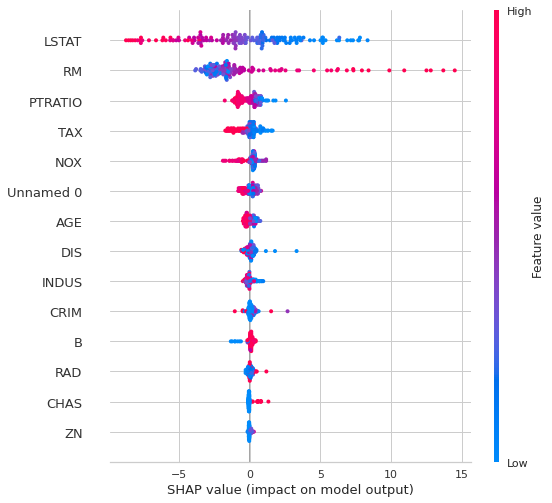

In [0]:
interpret_model(best)

*There are many other analyzing tools implemented in PyCaret such as morris sensitivity analysis, reason plot, dashboard etc. You can read more here: https://pycaret.gitbook.io/docs/get-started/functions/analyze.*

####Deployment
Let us demonstrate some useful functions:

- predict_model()

You can pass to the parameter **data** some new, unseen dataset. In the example below we didn't specify this parameter, so the predictions are made for the holdout set:

In [0]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.14,10.47,3.24,0.84,0.14,0.11


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,prediction_label
205,205,0.14,0.00,10.59,0.00,0.49,5.89,22.30,3.95,4.00,277.00,18.60,396.90,10.87,22.60,22.36
212,212,0.22,0.00,10.59,1.00,0.49,5.81,53.80,3.65,4.00,277.00,18.60,390.94,16.03,22.40,22.75
366,366,3.70,0.00,18.10,0.00,0.72,4.96,91.40,1.75,24.00,666.00,20.20,316.03,14.00,21.90,19.34
302,302,0.09,34.00,6.09,0.00,0.43,6.49,18.40,5.49,7.00,329.00,16.10,383.61,8.67,26.40,24.17
406,406,20.72,0.00,18.10,0.00,0.66,4.14,100.00,1.18,24.00,666.00,20.20,370.22,23.34,11.90,12.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,0.15,25.00,5.13,0.00,0.45,6.14,29.20,7.81,8.00,284.00,19.70,390.68,6.86,23.30,22.98
357,357,3.85,0.00,18.10,1.00,0.77,6.39,91.00,2.51,24.00,666.00,20.20,391.34,13.27,21.70,21.08
39,39,0.03,75.00,2.95,0.00,0.43,6.59,21.80,5.40,3.00,252.00,18.30,395.63,4.32,30.80,27.67
10,10,0.22,12.50,7.87,0.00,0.52,6.38,94.30,6.35,5.00,311.00,15.20,392.52,20.45,15.00,18.79


- finalize_model()

Refits on the entire dataset including the hold-out set.

In [0]:
finalize_model(tuned_model)

Out[19]: Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'CRIM', 'ZN',
                                             'INDUS', 'CHAS', 'NOX', 'RM',
                                             'AGE', 'DIS', 'RAD', 'TAX',
                                             'PTRATIO', 'B', 'LSTAT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=7542))])

- save_model()

Saves the model as a file in the working directory

In [0]:
save_model(tuned_model, 'my_best_model')

Transformation Pipeline and Model Successfully Saved
Out[20]: (Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'CRIM', 'ZN',
                                              'INDUS', 'CHAS', 'NOX', 'RM',
                                              'AGE', 'DIS', 'RAD', 'TAX',
                                              'PTRATIO', 'B', 'LSTAT'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=7542))]),
 'my_best_model.pkl')

- load_model()

Loads a previosly saved model

In [0]:
load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded
Out[21]: Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'CRIM', 'ZN',
                                             'INDUS', 'CHAS', 'NOX', 'RM',
                                             'AGE', 'DIS', 'RAD', 'TAX',
                                             'PTRATIO', 'B', 'LSTAT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=7542))])

##Your turn!

Now, it's time to take your newly acquired knowledge and skills to the next level by trying these powerful AutoML libraries for classification problem.

In [0]:
# Task: Import titanic.csv dataset

titanic_df = ...

In [0]:
X = titanic_df[['Sex', 'Embarked', 'Pclass', 'Age', 'Survived']]
y = titanic_df[['Survived']]

In [0]:
# Task: split the dataset into train and test sets

...

## Classification with LazyPredict

*Previously, we used LazyPredict for a regression problem. Now, since you have a classification task, it's recommended to go through the documentation to address the following task: https://lazypredict.readthedocs.io/en/latest/usage.html#classification.*

In [0]:
# Task: compare different classification models on titanic dataset with LazyClassifier

# Your code here...

# Think how would you interpret the results

## Classification with PyCaret

*For this new challenge, we encourage you to consult the PyCaret library's documentation to effectively handle the following task: https://pycaret.gitbook.io/docs/get-started/quickstart#classification.*

In [0]:
# Task: Initialize the environment

...

In [0]:
# Task: Compare models

...

In [0]:
# Task: Optimize the best default model. Set parameters in such a way that the function will return the most efficient model among the default and tuned models.

...

In [0]:
# Task: plot confusion matrix

...

# What does the confusion matrix tell us? 

In [0]:
# Task: get visualization of the pipeline. Hint: use evaluate_model()

...

# What is the most important feature? 
# Task: Let's take a look at survival rate by sex. Hint: use seaborn barplot() function. Don't forget to import seaborn!

...

# What conclusion can we make?

In [0]:
# Task: save the model as 'my_best_classifier'

...

Congratulations! You've completed the study notebook on automating machine learning workflows with PyCaret and LazyPredict. By automating repetitive tasks, these libraries enable us to iterate faster, experiment with various algorithms, and gain valuable insights from our data more efficiently.

While we explored a wide range of capabilities offered by these libraries, it's essential to note that we haven't covered every single function and feature they provide. As you continue your journey in machine learning, we encourage you to dive deeper into the documentation of both libraries to discover their full range of capabilities.

**Documentation:**

- LazyPredict: https://lazypredict.readthedocs.io/en/latest/

- PyCaret: https://pycaret.gitbook.io/docs/get-started/functions